In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [212]:
df = pd.read_csv('sample/weather.csv',index_col=1, parse_dates=['hpwren_timestamp']);
df.head()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
hpwren_timestamp,,,,,,,,,,,,
2011-09-10 00:00:49,0,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
2011-09-10 00:01:49,1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2011-09-10 00:02:49,2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
2011-09-10 00:03:49,3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
2011-09-10 00:04:49,4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [213]:
df.shape

(1587257, 12)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1587257 entries, 2011-09-10 00:00:49 to 2014-09-10 23:59:29
Data columns (total 12 columns):
rowID                 1587257 non-null int64
air_pressure          1587257 non-null float64
air_temp              1587257 non-null float64
avg_wind_direction    1586824 non-null float64
avg_wind_speed        1586824 non-null float64
max_wind_direction    1586824 non-null float64
max_wind_speed        1586824 non-null float64
min_wind_direction    1586824 non-null float64
min_wind_speed        1586824 non-null float64
rain_accumulation     1587256 non-null float64
rain_duration         1587256 non-null float64
relative_humidity     1587257 non-null float64
dtypes: float64(11), int64(1)
memory usage: 157.4 MB


In [215]:
df.dtypes

rowID                   int64
air_pressure          float64
air_temp              float64
avg_wind_direction    float64
avg_wind_speed        float64
max_wind_direction    float64
max_wind_speed        float64
min_wind_direction    float64
min_wind_speed        float64
rain_accumulation     float64
rain_duration         float64
relative_humidity     float64
dtype: object

In [216]:
# df_na = df.fillna(0)
# df_na
# null_columns=df_na.columns[df_na.isnull().any()]
# df_na[null_columns].isnull().sum()

In [217]:

# df_na  = df.fillna({
    
# })

# new_df = df.fillna(method="ffill")
# new_df
# new_df = df.fillna(method="bfill")
# new_df
# new_df = df.fillna(axis="ffill")
# new_df
# new_df = df.fillna(method="ffill")
# new_df
# removed all the na rows 
new_df = df.dropna(how="all");
#interpolate the na with time averaging
new_df2 = new_df1.interpolate(method ="time")

new_df = new_df2.fillna(method="bfill")
new_df


null_columns=new_df.columns[new_df.isnull().any()]
new_df[null_columns].isnull().sum()

Series([], dtype: float64)

In [218]:


new_df['Year'] = new_df.index.year
new_df['Month'] = new_df.index.month
new_df['quaters'] = new_df.index.quater
new_df['Weekday Name'] = new_df.index.weekday_name

# down sampling  (agregation)
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['air_temp','relative_humidity']
# Resample to weekly frequency, aggregating with mean
new_df_mean = new_df[data_columns].resample('W').mean()
new_df_mean.head()
new_df_daily = new_df[data_columns].resample('D').mean()
new_df_daily.head()


,air_temp,relative_humidity
hpwren_timestamp,,
2011-09-10,59.804250,71.322222
2011-09-11,62.041336,65.447738
2011-09-12,71.993875,27.497847
2011-09-13,71.277375,48.834861
2011-09-14,67.852201,55.885325


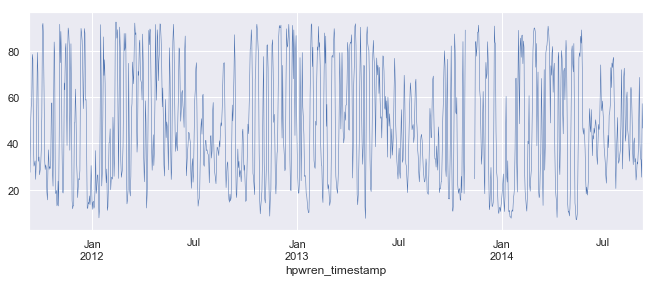

In [219]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
new_df_daily['relative_humidity'].plot(linewidth=0.5);

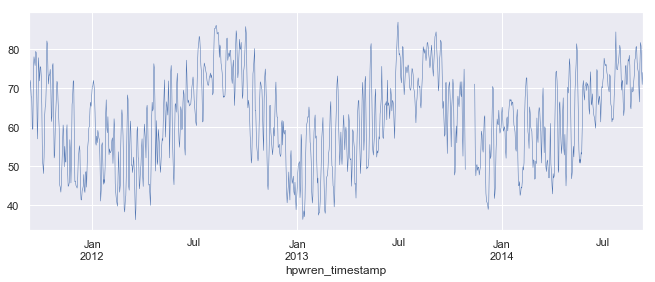

In [220]:
sns.set(rc={'figure.figsize':(11, 4)})
new_df_daily['air_temp'].plot(linewidth=0.5);

In [262]:
null_columns=new_df.columns[new_df.isnull().any()]
new_df[null_columns].isnull().sum()



Series([], dtype: float64)

Text(0,0.5,'temperature')

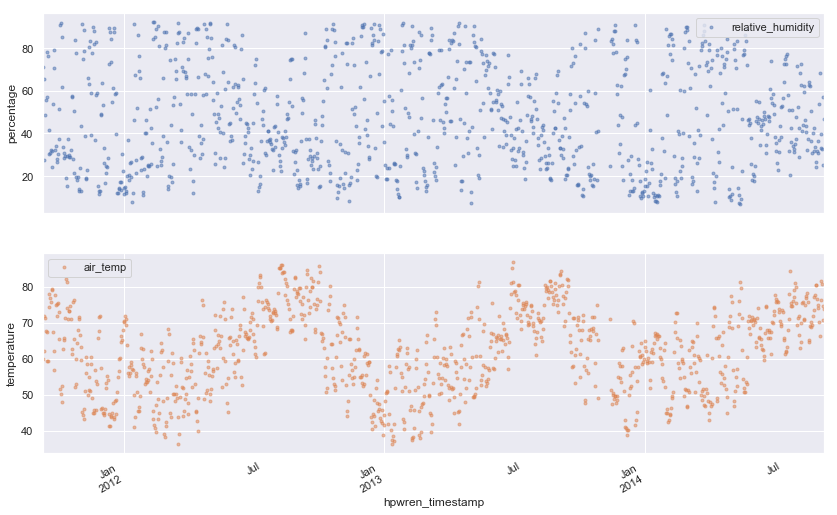

In [222]:
cols_plot = ['relative_humidity', 'air_temp']
axes = new_df_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 9), subplots=True)
axes[0].set_ylabel("percentage")
axes[1].set_ylabel("temperature")

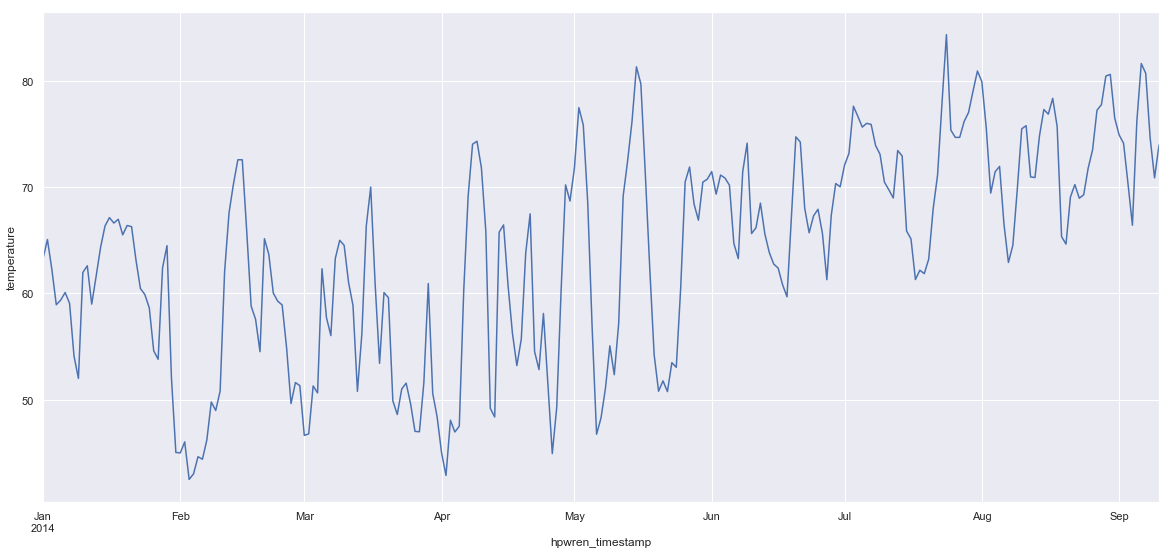

In [272]:
ax = new_df_daily.loc['2014', 'air_temp'].plot( figsize=(20, 9))
ax.set_ylabel('temperature');

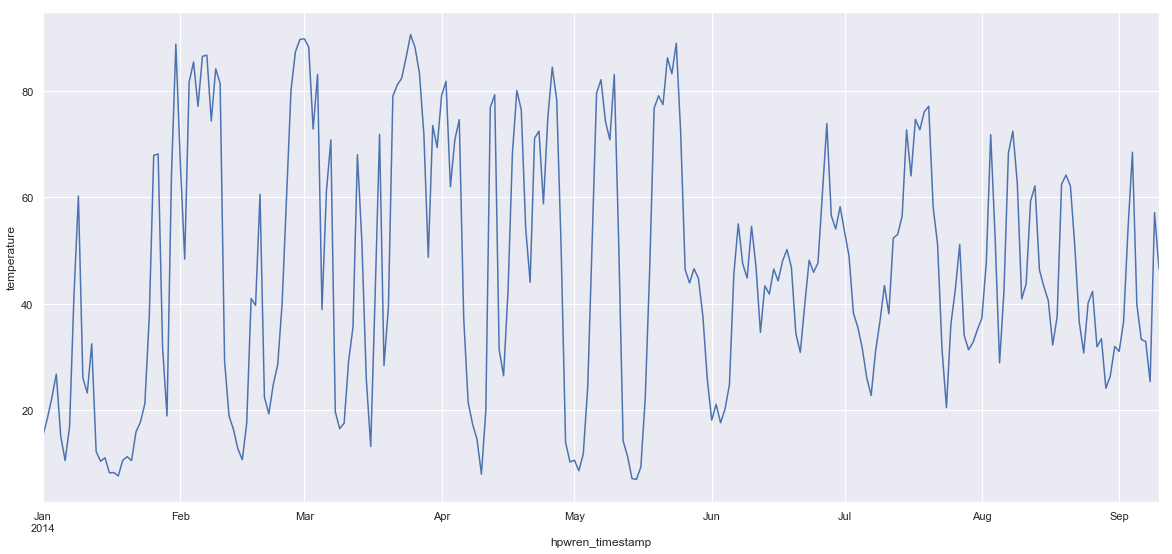

In [273]:
ax = new_df_daily.loc['2014', 'relative_humidity'].plot( figsize=(20, 9))
ax.set_ylabel('temperature');

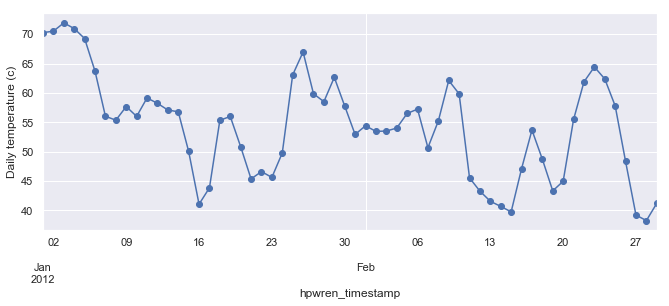

In [225]:
ax = new_df_daily.loc['2012-01':'2012-02', 'air_temp'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily temperature (c)');

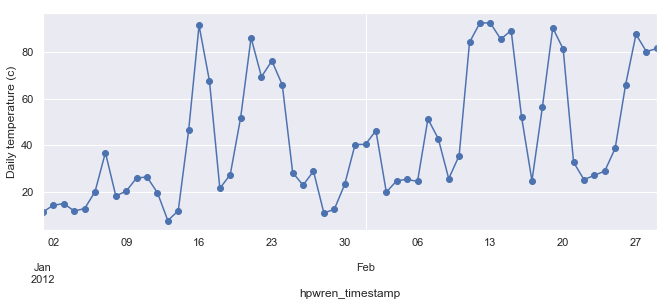

In [226]:
ax = new_df_daily.loc['2012-01':'2012-02', 'relative_humidity'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily temperature (c)');

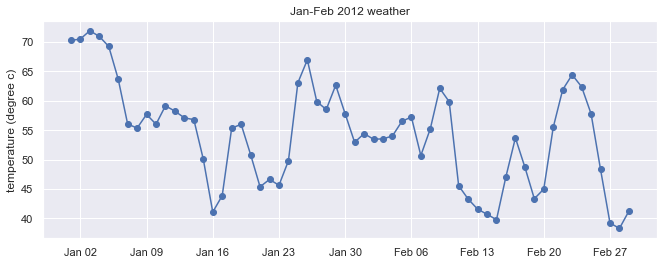

In [227]:
fig, ax = plt.subplots()
ax.plot(new_df_daily.loc['2012-01':'2012-02', 'air_temp'], marker='o', linestyle='-')
ax.set_ylabel('temperature (degree c)')
ax.set_title('Jan-Feb 2012 weather')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [228]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1587257 entries, 2011-09-10 00:00:49 to 2014-09-10 23:59:29
Data columns (total 15 columns):
rowID                 1587257 non-null int64
air_pressure          1587257 non-null float64
air_temp              1587257 non-null float64
avg_wind_direction    1587257 non-null float64
avg_wind_speed        1587257 non-null float64
max_wind_direction    1587257 non-null float64
max_wind_speed        1587257 non-null float64
min_wind_direction    1587257 non-null float64
min_wind_speed        1587257 non-null float64
rain_accumulation     1587257 non-null float64
rain_duration         1587257 non-null float64
relative_humidity     1587257 non-null float64
Year                  1587257 non-null int64
Month                 1587257 non-null int64
Weekday Name          1587257 non-null object
dtypes: float64(11), int64(3), object(1)
memory usage: 233.8+ MB


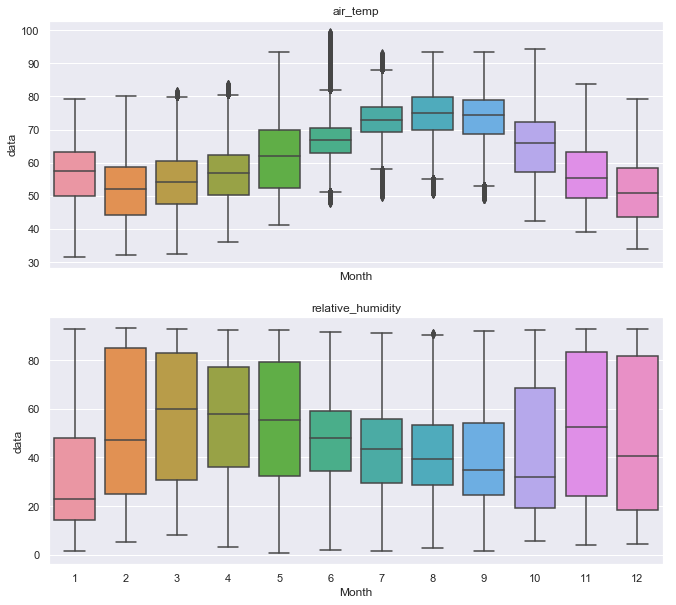

In [229]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['air_temp', 'relative_humidity'], axes):
    sns.boxplot(data=new_df, x='Month', y=name, ax=ax)
    ax.set_ylabel('data')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

# Analysis : 
#  july aug sept :  we have higer temperature  and low humidity 
#  

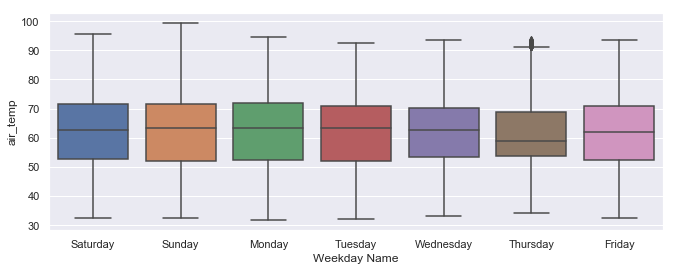

In [230]:
sns.boxplot(data=new_df, x='Weekday Name', y='air_temp');
#Analysis : air_temp is constant over whole  week 

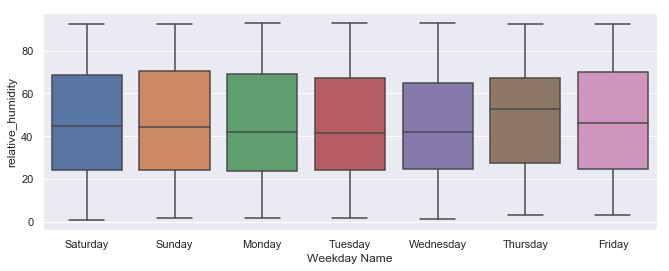

In [231]:
sns.boxplot(data=new_df, x='Weekday Name', y='relative_humidity');
#analysis : humidity is  constant over whole week 

In [232]:
new_df.index

DatetimeIndex(['2011-09-10 00:00:49', '2011-09-10 00:01:49',
               '2011-09-10 00:02:49', '2011-09-10 00:03:49',
               '2011-09-10 00:04:49', '2011-09-10 00:05:49',
               '2011-09-10 00:06:49', '2011-09-10 00:07:49',
               '2011-09-10 00:08:49', '2011-09-10 00:09:49',
               ...
               '2014-09-10 23:50:29', '2014-09-10 23:51:29',
               '2014-09-10 23:52:29', '2014-09-10 23:53:29',
               '2014-09-10 23:54:29', '2014-09-10 23:55:29',
               '2014-09-10 23:56:29', '2014-09-10 23:57:29',
               '2014-09-10 23:58:29', '2014-09-10 23:59:29'],
              dtype='datetime64[ns]', name=u'hpwren_timestamp', length=1587257, freq=None)

In [233]:
null_columns=new_df.columns[new_df.isnull().any()]
new_df[null_columns].isnull().sum()
# No null value

Series([], dtype: float64)

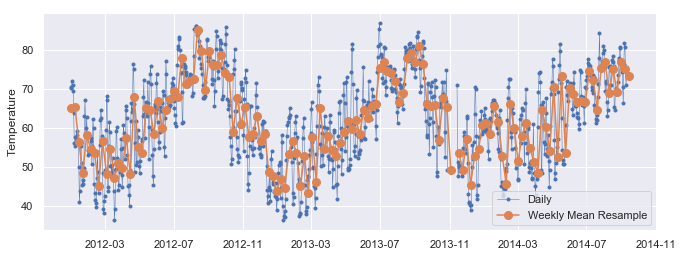

In [246]:
# Start and end of the date range to extract
start, end = '2012-01', '2014-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(new_df_daily.loc[start:end, 'air_temp'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(new_df_mean.loc[start:end, 'air_temp'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature')
ax.legend();

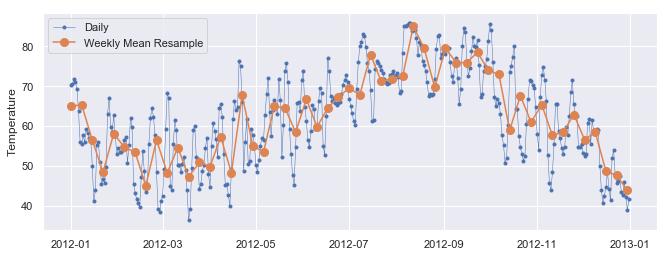

In [253]:
# Start and end of the date range to extract
start, end = '2012-01', '2012-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(new_df_daily.loc[start:end, 'air_temp'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(new_df_mean.loc[start:end, 'air_temp'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature')
ax.legend();

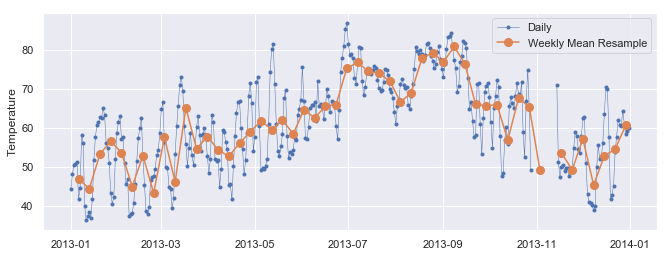

In [251]:
# Start and end of the date range to extract
start, end = '2013-01', '2013-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(new_df_daily.loc[start:end, 'air_temp'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(new_df_mean.loc[start:end, 'air_temp'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature')
ax.legend();

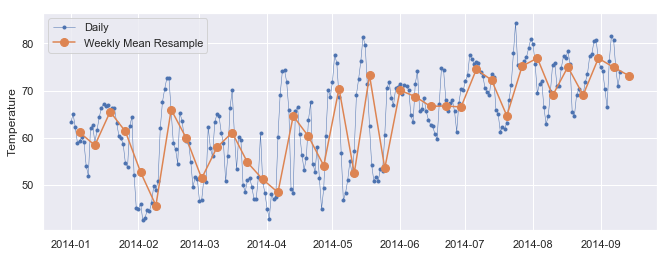

In [252]:
# Start and end of the date range to extract
start, end = '2014-01', '2014-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(new_df_daily.loc[start:end, 'air_temp'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(new_df_mean.loc[start:end, 'air_temp'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature')
ax.legend();

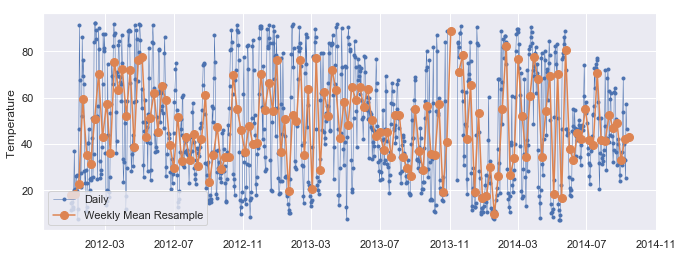

In [245]:
# Start and end of the date range to extract
start, end = '2012-01', '2014-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(new_df_daily.loc[start:end, 'relative_humidity'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(new_df_mean.loc[start:end, 'relative_humidity'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature ')
ax.legend();

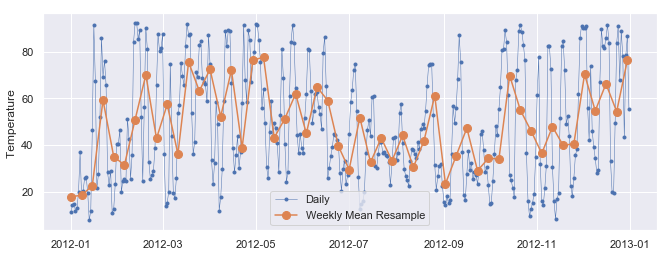

In [254]:
# Start and end of the date range to extract
start, end = '2012-01', '2012-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(new_df_daily.loc[start:end, 'relative_humidity'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(new_df_mean.loc[start:end, 'relative_humidity'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature ')
ax.legend();

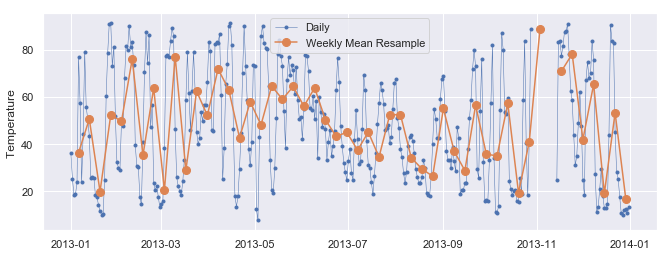

In [255]:
# Start and end of the date range to extract
start, end = '2013-01', '2013-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(new_df_daily.loc[start:end, 'relative_humidity'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(new_df_mean.loc[start:end, 'relative_humidity'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature ')
ax.legend();

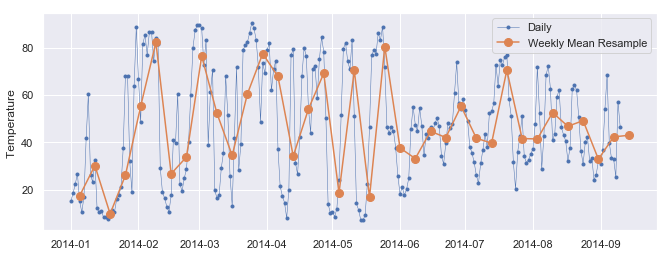

In [256]:
# Start and end of the date range to extract
start, end = '2014-01', '2014-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(new_df_daily.loc[start:end, 'relative_humidity'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(new_df_mean.loc[start:end, 'relative_humidity'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature ')
ax.legend();

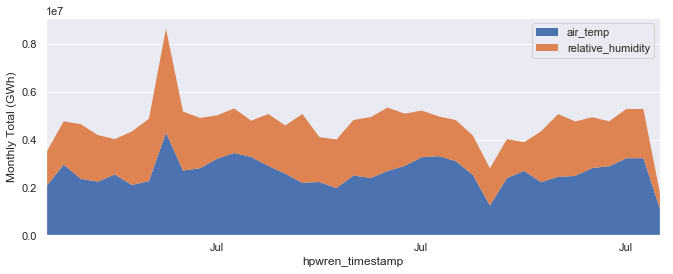

In [263]:
new_df_monthly = new_df[data_columns].resample('M').sum(min_count=28)
new_df_monthly.head(3)
new_df_monthly_mean = new_df[data_columns].resample('M').mean()
new_df_monthly_mean.head(3)
fig, ax = plt.subplots()
# ax.plot(new_df_monthly['air_temp'], color='black', label='air_temp')
new_df_monthly[['air_temp', 'relative_humidity']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

#analysis : on monthly basis: we can say the air temp is directly propotional to air temperature.

In [238]:
new_df_annual = new_df[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
new_df_annual = new_df_annual.set_index(new_df_annual.index.year)
new_df_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
new_df_annual['air_temp/relative_humidity'] = new_df_annual['air_temp'] / new_df_annual['relative_humidity']
new_df_annual.tail(3)

,air_temp,relative_humidity,air_temp/relative_humidity
Year,,,
2012,3.451681e+07,2.745145e+07,1.257377
2013,3.075030e+07,2.372738e+07,1.295984
2014,2.320783e+07,1.692780e+07,1.370989


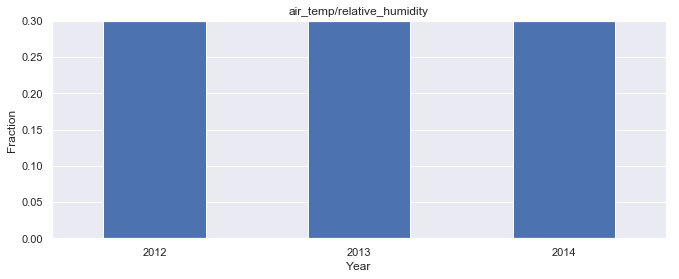

In [239]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = new_df_annual.loc[2012:, 'air_temp/relative_humidity'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('air_temp/relative_humidity')
plt.xticks(rotation=0);
# analysis : factor of change over year is 1 

In [240]:
# Rolling Window 
new_df_7d = new_df_daily[data_columns].rolling(7, center=True).mean()
new_df_7d.head(10)


,air_temp,relative_humidity
hpwren_timestamp,,
2011-09-10,NaN,NaN
2011-09-11,NaN,NaN
2011-09-12,NaN,NaN
2011-09-13,65.710541,57.801033
2011-09-14,65.665666,58.501797
2011-09-15,67.413701,55.102542
2011-09-16,68.269183,55.480181
2011-09-17,69.053506,52.934809
2011-09-18,70.177817,49.584991


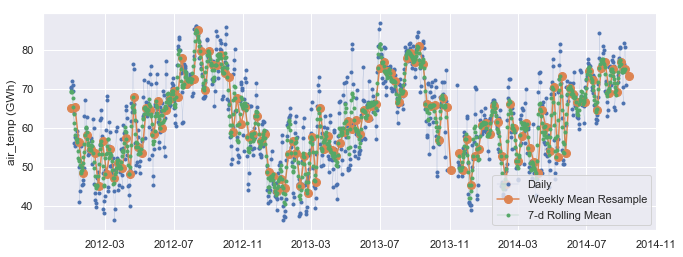

In [257]:
# Start and end of the date range to extract
start, end = '2012-01', '2014-12'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()

ax.plot(new_df_daily.loc[start:end, 'air_temp'],
marker='.', linestyle='-', linewidth=0.1, label='Daily')
ax.plot(new_df_mean.loc[start:end, 'air_temp'],
 marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(new_df_7d.loc[start:end, 'air_temp'],
 marker='.', linestyle='-',linewidth=0.2, label='7-d Rolling Mean')

ax.set_ylabel('air_temp (GWh)')
ax.legend();

In [242]:
new_df_365d = new_df_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()


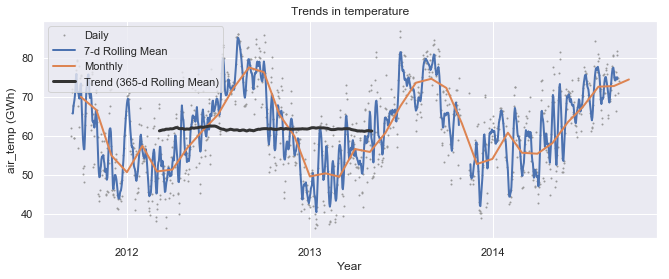

In [264]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(new_df_daily['air_temp'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(new_df_7d['air_temp'], linewidth=2, label='7-d Rolling Mean')
ax.plot(new_df_monthly_mean['air_temp'], linewidth=2, label='Monthly Mean')
ax.plot(new_df_365d['air_temp'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('air_temp (GWh)')
ax.set_title('Trends in temperature');

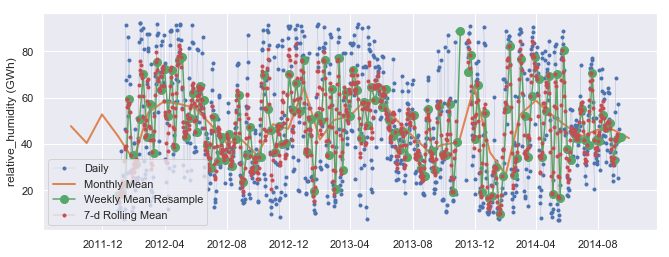

In [266]:
# Start and end of the date range to extract
start, end = '2012-01', '2014-12'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()

ax.plot(new_df_daily.loc[start:end, 'relative_humidity'],
marker='.', linestyle='-', linewidth=0.1, label='Daily')
ax.plot(new_df_monthly_mean['relative_humidity'], linewidth=2, label='Monthly Mean')
ax.plot(new_df_mean.loc[start:end, 'relative_humidity'],
 marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(new_df_7d.loc[start:end, 'relative_humidity'],
 marker='.', linestyle='-',linewidth=0.2, label='7-d Rolling Mean')

ax.set_ylabel('relative_humidity (GWh)')
ax.legend();

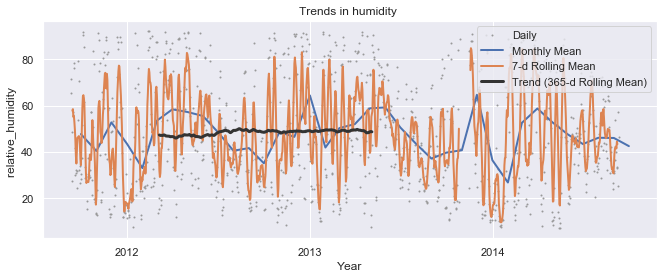

In [269]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(new_df_daily['relative_humidity'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(new_df_monthly_mean['relative_humidity'], linewidth=2, label='Monthly Mean')
ax.plot(new_df_7d['relative_humidity'], linewidth=2, label='7-d Rolling Mean')
ax.plot(new_df_365d['relative_humidity'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('relative_humidity ')
ax.set_title('Trends in humidity ');

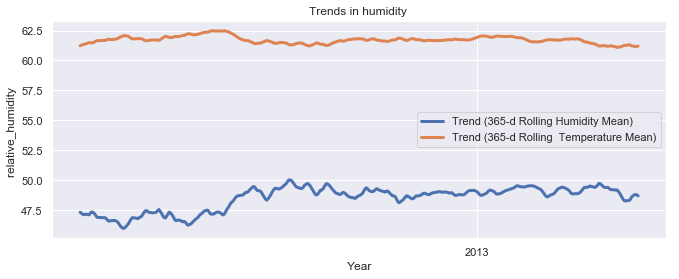

In [271]:
fig, ax = plt.subplots()

ax.plot(new_df_365d['relative_humidity'], linewidth=3,
label='Trend (365-d Rolling Humidity Mean)')
ax.plot(new_df_365d['air_temp'],  linewidth=3,
label='Trend (365-d Rolling  Temperature Mean)')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('relative_humidity ')
ax.set_title('Trends in humidity ');